In [1]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 1.3 MB/s 


# READ DATASET

In [2]:
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cleaning/vaksin.csv
/kaggle/input/cleaning/kbba.csv


In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/cleaning/vaksin.csv")
kbba = pd.read_csv("/kaggle/input/cleaning/kbba.csv")

In [4]:
df

,id,date,username,tweet,Kategori
0,1.351675e+18,2021-01-20,gunung_bandung,"Mudah2an kita yg merasa beragama, apalagi org ...",1
1,1.351673e+18,2021-01-20,gunung_bandung,"Kalo ada ancaman, misal mati, yah harus ada up...",1
2,1.351670e+18,2021-01-20,dubie_tina,PERHATIAN KHUSUS INI AYO DISIPLIN PROKES LEBIH...,1
3,1.351655e+18,2021-01-20,windjalil,Pada dasarnya hanya NAFSU akan kekuasaan dan m...,2
4,1.351652e+18,2021-01-20,breakkucing,Vaksin konspirasi Flat earthers Pandemi konspi...,2
...,...,...,...,...,...
367,1.350000e+18,2021-01-26,lilapama2011,meski ada efek samping setelah vaksinasi. Seca...,1
368,1.350000e+18,2021-01-26,kianinara1,Cintai bumimu Lindungi dari virus corona Taati...,1
369,1.350000e+18,2021-01-26,boy99under,https://t.co/3Hh8rGpcaH Saat nya kita bersatu...,1
370,1.350410e+18,2021-01-16,thalibhelmy,"@cursedkidd ""Vaksin corona terbuat dari peju k...",2


In [5]:
df1 = df.copy()
del df1['id'], df1['date'], df1['username']
df1

,tweet,Kategori
0,"Mudah2an kita yg merasa beragama, apalagi org ...",1
1,"Kalo ada ancaman, misal mati, yah harus ada up...",1
2,PERHATIAN KHUSUS INI AYO DISIPLIN PROKES LEBIH...,1
3,Pada dasarnya hanya NAFSU akan kekuasaan dan m...,2
4,Vaksin konspirasi Flat earthers Pandemi konspi...,2
...,...,...
367,meski ada efek samping setelah vaksinasi. Seca...,1
368,Cintai bumimu Lindungi dari virus corona Taati...,1
369,https://t.co/3Hh8rGpcaH Saat nya kita bersatu...,1
370,"@cursedkidd ""Vaksin corona terbuat dari peju k...",2


In [6]:
df1['Kategori'].value_counts()

1    191
2    181
Name: Kategori, dtype: int64

# PREPROCESSING

# 1. CASE FOLDING

In [7]:
df1['cleaned_tweets'] = df1['tweet'].apply(lambda x: x.lower())
df1

,tweet,Kategori,cleaned_tweets
0,"Mudah2an kita yg merasa beragama, apalagi org ...",1,"mudah2an kita yg merasa beragama, apalagi org ..."
1,"Kalo ada ancaman, misal mati, yah harus ada up...",1,"kalo ada ancaman, misal mati, yah harus ada up..."
2,PERHATIAN KHUSUS INI AYO DISIPLIN PROKES LEBIH...,1,perhatian khusus ini ayo disiplin prokes lebih...
3,Pada dasarnya hanya NAFSU akan kekuasaan dan m...,2,pada dasarnya hanya nafsu akan kekuasaan dan m...
4,Vaksin konspirasi Flat earthers Pandemi konspi...,2,vaksin konspirasi flat earthers pandemi konspi...
...,...,...,...
367,meski ada efek samping setelah vaksinasi. Seca...,1,meski ada efek samping setelah vaksinasi. seca...
368,Cintai bumimu Lindungi dari virus corona Taati...,1,cintai bumimu lindungi dari virus corona taati...
369,https://t.co/3Hh8rGpcaH Saat nya kita bersatu...,1,https://t.co/3hh8rgpcah saat nya kita bersatu...
370,"@cursedkidd ""Vaksin corona terbuat dari peju k...",2,"@cursedkidd ""vaksin corona terbuat dari peju k..."


# 3. NORMALISASI

In [8]:
import re

def normalisasi(text):
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"@\w+", " ", text)
  text = re.sub(r"#\w+", " ", text)
  text = re.sub(r'\W', " ", text)
  text = re.sub(r"\d+", "", text)
  text = re.sub(r'_', ' ',text)
  text = re.sub(r' +', ' ', text)
  text = re.sub(r"^\s+", '', text)
  #text = text.lstrip()
  return text

In [9]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: normalisasi(x))

# 4. BAKU

In [10]:
dict = {row[0] : row[1] for _, row in pd.read_csv("/kaggle/input/cleaning/kbba.csv").iterrows()}

In [11]:
def kbbi(text): 
    token = text.split()
    final_string = ' '.join(str(dict.get(word, word)) for word in token)
    return final_string

In [12]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: kbbi(x))

# 5. STOPWORDS

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  

def remove_stop_words(text):
    text = text.split()
    listStopword =  set(stopwords.words('indonesian'))
    text = [w for w in text if not w in listStopword]
    text = " ".join(text)
    return text

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: remove_stop_words(x))
df1

,tweet,Kategori,cleaned_tweets
0,"Mudah2an kita yg merasa beragama, apalagi org ...",1,mudahan beragama orang islam mendukung upaya p...
1,"Kalo ada ancaman, misal mati, yah harus ada up...",1,ancaman mati ya upaya mencegahnya contoh virus...
2,PERHATIAN KHUSUS INI AYO DISIPLIN PROKES LEBIH...,1,perhatian khusus ayo disiplin prokes vaksin se...
3,Pada dasarnya hanya NAFSU akan kekuasaan dan m...,2,dasarnya nafsu kekuasaan menguasai dunia menja...
4,Vaksin konspirasi Flat earthers Pandemi konspi...,2,vaksin konspirasi flat earthers pandemi konspi...
...,...,...,...
367,meski ada efek samping setelah vaksinasi. Seca...,1,efek samping vaksinasi vaksin corona aman keja...
368,Cintai bumimu Lindungi dari virus corona Taati...,1,cintai bumimu lindungi virus corona taati pera...
369,https://t.co/3Hh8rGpcaH Saat nya kita bersatu...,1,nya bersatu padu perang melawan corona menteri...
370,"@cursedkidd ""Vaksin corona terbuat dari peju k...",2,vaksin corona terbuat sperma ku loh


In [15]:
def noise(text): 
    text = text.split()
    listStopword =  ['amp', 'tong', 'fry', 'vcs', 'bahh', 'a', 'wkwkwk', 'c', 'yeey', 'oi', 'pret', 'iya', 'nya', 'sih', 'mbok', 'ku', 'loh', 'lho', 'ah', 'nihh', 'ya', 'hah', 'joss', 'deh''rmp', 'v', 'via', 'lha', 'mah', 'xixi']
    text = [w for w in text if not w in listStopword]
    text = " ".join(text)
    return text

In [16]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: noise(x))

# 6. STEAMING

In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def steamming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    split = text.split()
    hasil = [stemmer.stem(token) for token in split]
    hasil = " ".join(hasil)
    return hasil

In [18]:
df1['cleaned_tweets'] = df1['cleaned_tweets'].apply(lambda x: steamming(x))
df1

,tweet,Kategori,cleaned_tweets
0,"Mudah2an kita yg merasa beragama, apalagi org ...",1,mudah agama orang islam dukung upaya cegah tul...
1,"Kalo ada ancaman, misal mati, yah harus ada up...",1,ancam mati upaya cegah contoh virus corona int...
2,PERHATIAN KHUSUS INI AYO DISIPLIN PROKES LEBIH...,1,perhati khusus ayo disiplin prokes vaksin sege...
3,Pada dasarnya hanya NAFSU akan kekuasaan dan m...,2,dasar nafsu kuasa kuasa dunia jadi sandiwara c...
4,Vaksin konspirasi Flat earthers Pandemi konspi...,2,vaksin konspirasi flat earthers pandemi konspi...
...,...,...,...
367,meski ada efek samping setelah vaksinasi. Seca...,1,efek samping vaksinasi vaksin corona aman jadi...
368,Cintai bumimu Lindungi dari virus corona Taati...,1,cinta bumi lindung virus corona taat atur pbb ...
369,https://t.co/3Hh8rGpcaH Saat nya kita bersatu...,1,satu padu perang lawan corona menteri jhony pl...
370,"@cursedkidd ""Vaksin corona terbuat dari peju k...",2,vaksin corona buat sperma


In [19]:
df2 = df1.copy()
del df2['tweet']
df2 = df2.drop_duplicates()
df2 = df2.dropna()
df2

,Kategori,cleaned_tweets
0,1,mudah agama orang islam dukung upaya cegah tul...
1,1,ancam mati upaya cegah contoh virus corona int...
2,1,perhati khusus ayo disiplin prokes vaksin sege...
3,2,dasar nafsu kuasa kuasa dunia jadi sandiwara c...
4,2,vaksin konspirasi flat earthers pandemi konspi...
...,...,...
365,1,harap ustadz ikadi dukung program perintah put...
366,1,pandemi corona dampak sehat ekonomi ekonomi uj...
367,1,efek samping vaksinasi vaksin corona aman jadi...
370,2,vaksin corona buat sperma


In [20]:
df2.to_csv('prepocessing.csv',index=False)

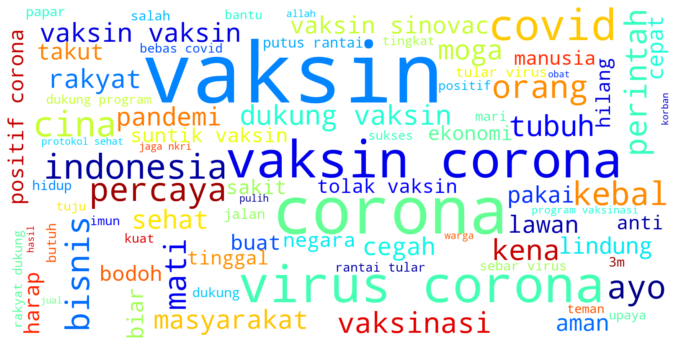

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

wd_list = df2['cleaned_tweets']
#liststopwords = set(stopwords.words('indonesian'))
all_words = ' '.join([text for text in wd_list])

wordcloud = WordCloud(
    background_color='white',
    #stopwords=liststopwords,
    width=1600,
    height=800,
    random_state=1,
    colormap='jet',
    max_words=80,
    max_font_size=200).generate(all_words)
plt.figure(figsize=(12, 10))
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear");

# VEKTORISASI

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
text_counts = cv.fit_transform(df2['cleaned_tweets'])

# SPLIT DATASET

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df2['Kategori'], test_size=0.25)

In [24]:
print(X_train.shape, X_test.shape)

(257, 965) (86, 965)


# KLASIFIKASI

# 1. Naive Bayes MNB

In [25]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [26]:
from sklearn import metrics

predicted = MNB.predict(X_test)
model1 = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2f}'.format(model1*100))+'%')

91.86%


In [27]:
from sklearn.metrics import confusion_matrix
import numpy as np

confusion = confusion_matrix(Y_test, predicted)
print(confusion)

[[35  6]
 [ 1 44]]


<AxesSubplot:>

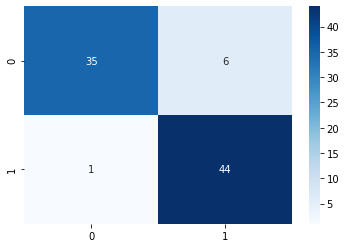

In [28]:
import seaborn as sns

sns.heatmap(confusion, annot=True,  cmap='Blues')

In [29]:
output1 = pd.DataFrame({'tweet': X_test, 'label': predicted})

In [30]:
output1['label'].value_counts()

2    50
1    36
Name: label, dtype: int64

# 2. Naive Bayes BNB

In [31]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)
model2 = metrics.accuracy_score(BNB.predict(X_test),Y_test)
print('BNB accuracy = ' + str('{:4.2f}'.format(model2*100))+'%')

BNB accuracy = 91.86%


In [32]:
predicted = BNB.predict(X_test)
confusion = confusion_matrix(Y_test, predicted)
print(confusion)

[[35  6]
 [ 1 44]]


<AxesSubplot:>

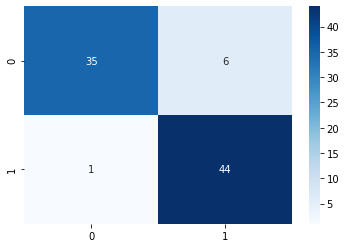

In [33]:
sns.heatmap(confusion, annot=True,  cmap='Blues')

In [34]:
output = pd.DataFrame({'tweet': X_test, 'label': predicted})

In [35]:
output['label'].value_counts()

2    50
1    36
Name: label, dtype: int64

# SAVE MODEL

In [36]:
import joblib

filename = 'vektor.sav'
joblib.dump(cv, filename)

['vektor.sav']

In [37]:
filename = 'MNB.sav'
joblib.dump(MNB, filename)

['MNB.sav']

In [38]:
filename = 'BNB.sav'
joblib.dump(BNB, filename)

['BNB.sav']

# IMPLEMENTASI

In [39]:
vektor = joblib.load("vektor.sav")
MNB = joblib.load("MNB.sav")

In [40]:
result = MNB.predict(vektor.transform(["Harapan kita dengan vaksin ini bisa menghilangkan virus corona #DukungSehatkanBangsa Wajib Bebas Covid"]))
if (result == [2]) :
  result = "negatif"
elif (result == [1]) :
  result = "positif"

result

'positif'

In [41]:
BNB = joblib.load("BNB.sav")
result = BNB.predict(vektor.transform(["Waduh! Berkurang Lagi, Kemanjuran Vaksin Corona Sinovac di Brasil Cuma 50 Persen"]))
if (result == [2]) :
  result = "negatif"
elif (result == [1]) :
  result = "positif"

result

'negatif'